In [1]:
import osiris_utils as ou 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Derivatives using `Derivative_Simulation` object

In this notebook we will show how to use the `Derivative_Simulation` object to compute derivatives of a function with respect to the time and space coordinates. 

As an example, we will compute the residual of the continuity equation of a thermal plasma, in the x-direction, this is, the LHS of:

$$
\frac{\partial n}{\partial t} + \frac{\partial}{\partial x}(n v_1) = 0
$$

For this, we need the derivatives of the density `n` and the velocity `v1` with respect to the time and space coordinates. The `Derivative_Simulation` object will compute these derivatives using finite differences.

Initialize the simulation object:

In [ ]:
sim = ou.Simulation(input_deck_path="example_data/thermal.1d")

Initialize the `Derivative_Simulation` objects with respect to the time and $x_1$ coordinate, since these are the derivatives that we want to compute.

In [3]:
d_dt = ou.Derivative_Simulation(sim, "t")
d_dx1 = ou.Derivative_Simulation(sim, "x1")

Note that the derivative with respect to $x_1$ is applied not to one diagnostic, but to the product of two diagnostics. We can take advantage of the operations between diagnostics to compute this "new" diagnostic, the product of the density and the fluid velocity.

In [5]:
# Create a new diagnostic n * vfl1
nVfl1 = sim["electrons"]["n"] * sim["electrons"]["vfl1"] 
# Add this to the simulation (electrons)
sim["electrons"].add_diagnostic(nVfl1, "nVfl1")

Now that we have the diagnostics needed in our `Simulation` object, we can directly reconstruct the equation desired:

In [6]:
continuity = d_dt["electrons"]["n"] + d_dx1["electrons"]["nVfl1"]

This is a new diagnostic, and we can now access to its iterations using indexing

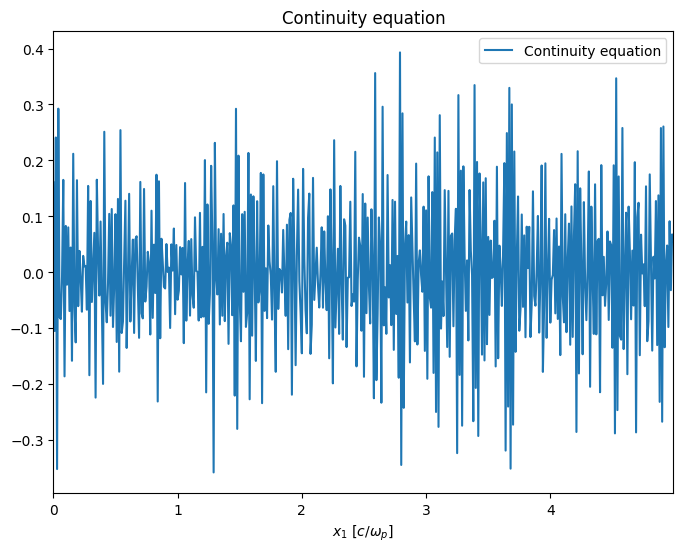

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Continuity equation residuals")
plt.xlabel(continuity.axis[0]["plot_label"])

plt.plot(continuity.x, continuity[10], label="Continuity equation")
plt.legend()
plt.xlim(continuity.x[0], continuity.x[-1])
plt.show()

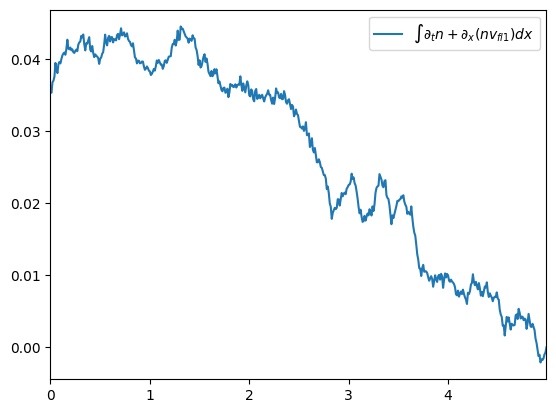

In [17]:
plt.plot(continuity.x, ou.integrate(continuity[10], continuity.dx), label=r"$\int \partial_t n + \partial_x( n v_{fl1}) dx$")
plt.legend()
plt.xlim(continuity.x[0], continuity.x[-1])
plt.show()